# Final Background

## Title

Analysis of China's Population.

## Problem

The impact of changes in China's one-child policy on China's population and gender ratios.

## Background

Around the 1960s, China saw a huge leap in population due to low death rates and a spike in birth rates. With concern for the growth in population, policymakers instituted the one-child policy in 1980s. This policy restricted families to only birth one child and heavily fined those that raised more than one. Other enforcement methods included mandatory sterilization, forced abortions, and governmental pushes for contraceptives [1,3]. 

As of recent times, China sits at around 1.4 billion people as the number one most populous country [2]. The growth of the population seems to have died down thus far, and policymakers have relaxed the one-child policy in 2013 and proceeded to abolish it in 2016. Now China is allowing for each family to have two children [1]. Though the policy has ended, lasting effects can be seen in the population. Today, China is facing issues with an incredibly high male to female ratio [7]. The one-child policy may have expounded this issue. Due to the preference for male laborers in rural areas, and the limit on children, many rural families likely prefer for their one child to be male. There have been a number of cases of voluntary sex-selective abortions in rural areas, where fetuses are aborted after being determined female [6,7]. I would like to explore if there is a connection between changes in the policy and changes in gender ratios and number of sex-selective abortions across the years. 

Other changes in population have also been identified, such as an aging population and a greater number of old individuals [1,5]. I would also like to examine other aspects of China's population over time and find out if any other changes may be linked to alterations in the one-child policy.


## Questions and Justification

**Has China's population growth slowed in recent years and how might it be projected to grow?**

- China still faces many issues of overpopulation. Cities are crowded and the population is putting a strain on natural resources. Overpoplulation has contributed to growing water and air pollution as well [4]. Analyzing how the population is proceeding is important in determining whether the growth is sustainable.

**Were there any differences in the population / population growth before and after the repeal of the one-child policy?**
    
- As the one-child policy was such a long-lasting and widely enforced policy, I hypothesis that there would at least be some lasting effects. Exploring this question may give insight on how the policy has effected the population. Would be good to examine population by age as well.

**What does the gender ratio and mortality rate at birth by gender in china look like across the years and does the one-child policy seem to have an effect?**

- China currently has a higher male to female ratio and there has been evidence of sex-selective abortions in rural areas [6,7]. Examining how this has changed over time may reveal what factors effect the issue. 

## Datasets:

- [Population and other data for China across years](https://data.worldbank.org/country/china?view=chart)
    - Data on population, life expectancy, climate change, and more for China from 1960-2019. 
- [Gender ratio data](https://ourworldindata.org/gender-ratio)
    - Information about sex ratios, birth and mortality rates by sex, life expectancy by sex, and more for all countries across 1962-2017.
- [Minimum set of gender indicators](https://genderstats.un.org/#/downloads)
    - Data on child mortality rates, employment, education, and etc by sex for all countries 1990-2020.

## Concerns and Considerations

If it is found that the population is no longer growing at a alarming rate, people may deem this as a success of the one-child policy. We should be careful to not ignore the negative consequences of such an impactful policy. Vice-versa, if female birth mortality is found to have increased under the policy, we should also be wary of jumping to overly demonizing the government and/or policy. Effects of policies are hard to predict, and reasons behind sex-selective abortions stretch beyond more than just one policy.

There are some concerns in attributing too much of the change in population to changes in the one-child policy. I would like to see if some of the changes line up with the timeline of changes to the policy, but this does not mean the policy is the sole or even main cause of population changes. We should keep in mind that other things, like economic and cultural changes, may have an effect on birth rates and gender ratios in China. Changes in policy may also be partly reactionary to changes in population too, so that is another thing to keep in mind.

## Sources

1. “One-Child Policy.” Wikipedia, Wikimedia Foundation, 30 Apr. 2021, https://en.wikipedia.org/wiki/One-child_policy.
2. “People's Republic of China.” Data Commons, Data Commons, https://datacommons.org/place/country/CHN.
3. Fensom, Anthony. “Dangerous Demographics: China's Population Problem Will Eclipse Its Ambitions.” The National Interest, The Center for the National Interest, 16 Sept. 2019, https://nationalinterest.org/feature/dangerous-demographics-chinas-population-problem-will-eclipse-its-ambitions-80961
4. G, Qu, and Li J. “An Outline of Study on China's Population / Environment Issues.” China Population Newsletter, U.S. National Library of Medicine, https://pubmed.ncbi.nlm.nih.gov/12286553/.
5. Wang, Feng, and Eswar Prasad. “China's Population Destiny: The Looming Crisis.” Brookings, Brookings, 28 July 2016, www.brookings.edu/articles/chinas-population-destiny-the-looming-crisis/.
6. Pandey, Kiran. “Selective Abortions Killed 22.5 Million Female Foetuses in China, India.” Down To Earth, https://www.downtoearth.org.in/news/health/selective-abortions-killed-22-5-million-female-foetuses-in-china-india-64043.
7. Zhu, W. X., et al. “China's Excess Males, Sex Selective Abortion, and One Child Policy: Analysis of Data from 2005 National Intercensus Survey.” BMJ, vol. 338, no. apr09 2, 2009, doi:10.1136/bmj.b1211, https://www.researchgate.net/publication/24270887_China's_excess_males_sex_selective_abortion_and_one_child_policy_Analysis_of_data_from_2005_national_intercensus_survey



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

from scipy import stats as scipystats
#import statsmodels.api
#from statsmodels import stats as smstats

from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("ticks")

In [3]:
popTotal = pd.read_csv('data/PopulationTotal_All.csv',sep='\t',skiprows=4)
popTotal = popTotal.drop(columns=["Indicator Name", "Indicator Code"])
popTotal = pd.melt(popTotal, id_vars=["Country Name", "Country Code"], var_name='Year', value_name="Population Total")
popTotal["Year"] = popTotal["Year"].astype(int)
popTotal[popTotal["Population Total"].isna()]

chinaTotal = popTotal[popTotal["Country Name"] == "China"].sort_values("Year")
chinaTotal

,Country Name,Country Code,Year,Population Total
38,China,CHN,1960,6.670700e+08
302,China,CHN,1961,6.603300e+08
566,China,CHN,1962,6.657700e+08
830,China,CHN,1963,6.823350e+08
1094,China,CHN,1964,6.983550e+08
...,...,...,...,...
14822,China,CHN,2016,1.378665e+09
15086,China,CHN,2017,1.386395e+09
15350,China,CHN,2018,1.392730e+09
15614,China,CHN,2019,1.397715e+09


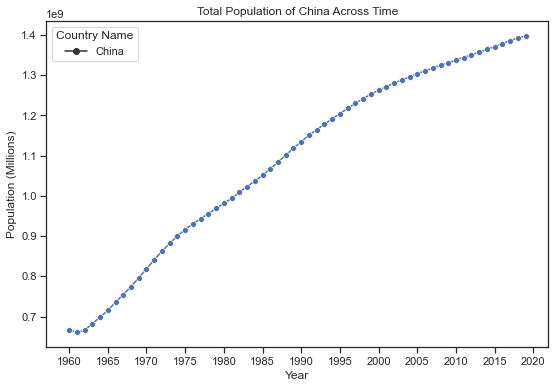

In [30]:
fig, ax = plt.subplots()
chinaTotalPlot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = chinaTotal,
                        style = 'Country Name', 
                        markers = True,
                        dashes = False,
                        markersize = 6
)
"""for ind, label in enumerate(chinaTotalPlot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
"""                     

#plt.locator_params(axis='x', nbins=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaTotalPlot.set(xlabel='Year', ylabel="Population (Millions)", title="Total Population of China Across Time")
#plt.ylim(0)

plt.show()

## Comparing China's pop to other countries

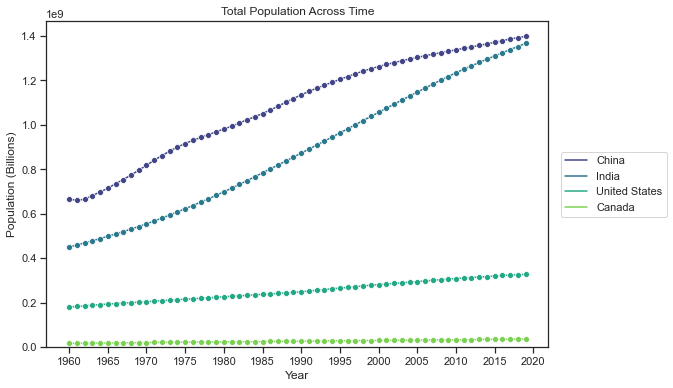

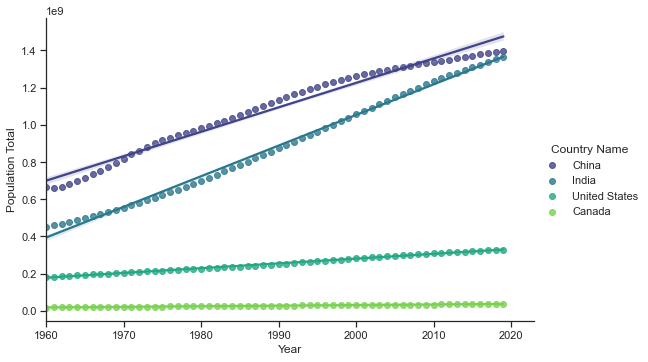

In [168]:
fig, ax = plt.subplots()

countries = ["China", "India", "United States", "Canada"]

df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )


ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)
plt.show()

#seaborn doesn't let you get slope and intercept for reg??
sns.lmplot(x="Year", y="Population Total", data=df, hue="Country Name", palette = 'viridis', hue_order = countries, aspect = 1.5);

## ML regression lines

China
R^2: 0.9749416187485966
Slope: 13142568.769102529
Intercept: -25059270899.462814

India
R^2: 0.9956201264767867
Slope: 16474505.296415677
Intercept: -31895441569.81899

United States
R^2: 0.9963453743349272
Slope: 2567184.157460406
Intercept: -4853639109.717478

Canada
R^2: 0.9988952320840608
Slope: 319350.15473742713
Intercept: -607828173.0334445



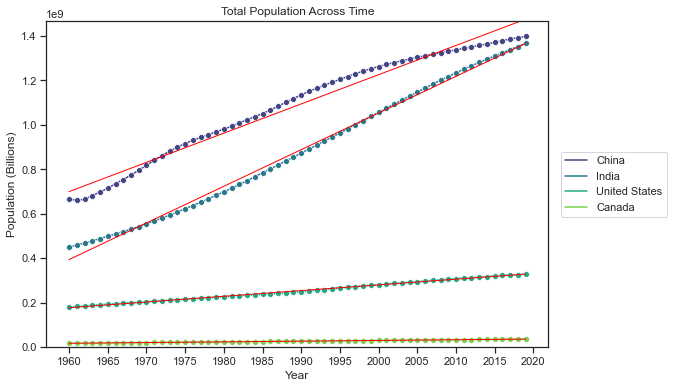

In [169]:
def linReg(name, yearMin, yearMax):
    model=LinearRegression(fit_intercept=True)
    df = popTotal[ (popTotal["Year"] >= yearMin) & (popTotal["Year"] <= yearMax)] 
    df = df[df["Country Name"] == name]
    x = df[["Year"]]
    y = df[["Population Total"]]
    model.fit(x, y)
    score = model.score(x, y)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    return (slope, intercept, score)

fig, ax = plt.subplots()
df = popTotal[popTotal['Country Name'].isin(countries)]
df_plot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = df,
                        hue = 'Country Name',
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        hue_order = countries, 
                        palette = 'viridis'
                      )

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
df_plot.set(xlabel='Year', ylabel="Population (Billions)", title="Total Population Across Time")
plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.ylim(0)


for country in countries:
    slope,intercept,score = linReg(country, 1960, 2019)
    print(country + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
    xfit = np.linspace(1960,2019,100) # returns every split 100 nums from 0 to 10
    yfit = slope * xfit + intercept
    plt.plot(xfit,yfit, color="red", zorder=2, linewidth=1)

plt.show()

* Other countries tend to have a more linear population growth
* China's population fluctuates much more than the others
* May be the change in policy effecting population

China 1960-1980s
R^2: 0.9904327799144284
Slope: 17834863.636363633
Intercept: -34318004696.969692

China 1980-2013
R^2: 0.9738445910350151
Slope: 11676994.652406415
Intercept: -22112760705.882347

China 2013-2019
R^2: 0.9985348730094373
Slope: 6999733.082706769
Intercept: -12732522879.699253



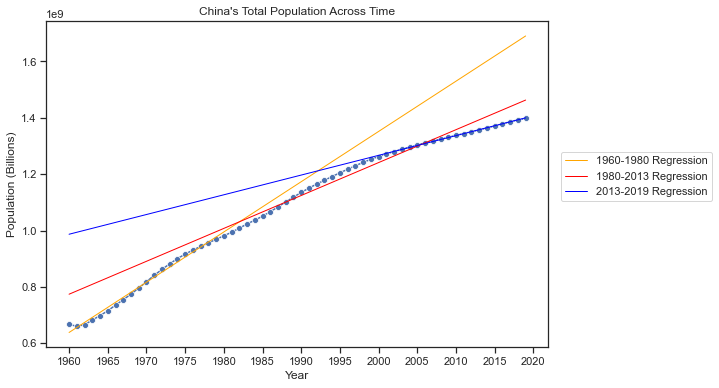

In [205]:
fig, ax = plt.subplots()
chinaTotalPlot = sns.lineplot(x = 'Year',
                        y = 'Population Total',
                        data = chinaTotal,
                        marker = 'o',
                        markers = True,
                        dashes = False,
                        markersize = 6,
                        palette = "Greys"
)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
chinaTotalPlot.set(xlabel='Year', ylabel="Population (Billions)", title="China's Total Population Across Time")
#plt.ylim(0)

slope,intercept,score = linReg("China", 1960, 1980)
print("China 1960-1980s" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, color="orange", zorder=2, linewidth=1, label="1960-1980 Regression")

slope,intercept,score = linReg("China", 1980, 2013)
print("China 1980-2013" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit,yfit, color="red", zorder=2, linewidth=1,  label="1980-2013 Regression")

slope,intercept,score = linReg("China", 2000, 2019)
print("China 2013-2019" + "\nR^2: " + str(score) + "\nSlope: "+ str(slope) + "\nIntercept: "+ str(intercept) + "\n")
xfit = np.linspace(1960,2019,100)
yfit = slope * xfit + intercept
plt.plot(xfit,yfit, color="blue", zorder=2, linewidth=1, label="2013-2019 Regression")

plt.legend(bbox_to_anchor=(1.025, .6), loc=2, borderaxespad=0)
plt.show()

* From 1960 - 1980 when there was no restrictive policies, we have the greatest slope / projected growth
* After 1980, the slope gets quite a bit lower and growth seems to die down
* Surprisingly after 2013 when restrictions were loosened, project population growth is even lower than before
* Has not seemed to bounce back yet